In [1]:
from google.colab import files
files.upload()

Saving lena.jpg to lena.jpg


{'lena.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x0b\x08\x01\xfc\x01\xfd\x01\x01\x11\x00\xff\xc4\x00\x1f\x00\x00\x01\x04\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x06\x05\x07\x08\t\x03\x04\n\x02\x01\x00\x0b\xff\xc4\x00F\x10\x00\x02\x02\x02\x01\x03\x03\x03\x03\x03\x02\x06\x01\x01\x00\x13\x01\x02\x03\x04\x05\x11\x12\x06\x13!\x00\x071\x08\x14"#2A\t\x15QBa\x16$3Rq\x81\x91\xa1\x17%Cb\xb1\xf0\n\x184r\xc1&\x82\xd15S\x83\xe1\xf1\xff\xda\x00\x08\x01\x01\x00\x00?\x00\x9f\xa9|w\x16TA\xc9\xdc\x08\xb9\xb2\xa2\xf8`\x06\xf9\x15\x1a\xdf\x8f?:\xf1\xfe\xc9\x97\xedI\xfa\xdd\xb8\xe3\x99fh\xcf0u\xa6\x86\xd4\xdcF\x98\x83\xb1\x03\xf2\xf0\x08\xff\x00N\xcbx\xf4\x9fnYK\xc6\xc5\x10\xa0\x1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [3]:
img = plt.imread('lena.jpg')

In [4]:
def convolution(image, filtre):
    result = convolve2d(image, filtre, mode='same')
    return result

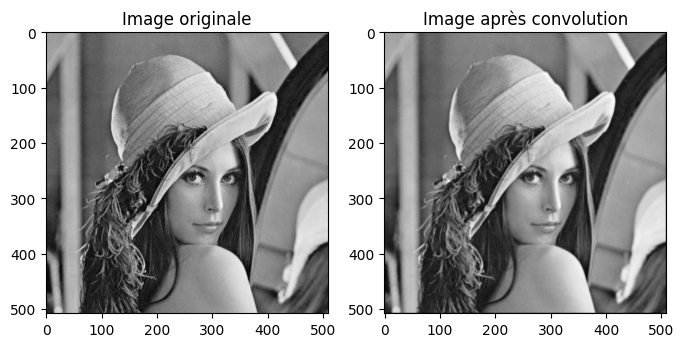

In [19]:
filtre_passe_bas_3x3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]],float) / 16
res1 = convolution(img,filtre_passe_bas_3x3)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Image originale')
ax[1].imshow(res1, cmap='gray')
ax[1].set_title('Image après convolution')
plt.show() 

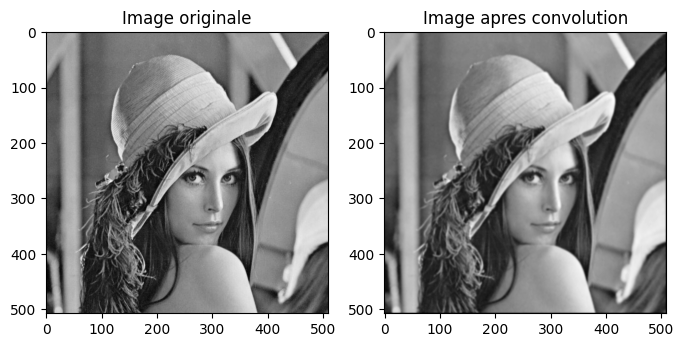

In [20]:
filtre_passe_bas_5x5 = np.array([[1,4,6,4,1], [4,8,14,8,4], [6,14,28,14,6], [4,8,14,8,4],[1,4,6,4,1]], float)/176
res2= convolution(img,filtre_passe_bas_5x5)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Image originale')
ax[1].imshow(res2, cmap='gray')
ax[1].set_title('Image apres convolution')
plt.show() 

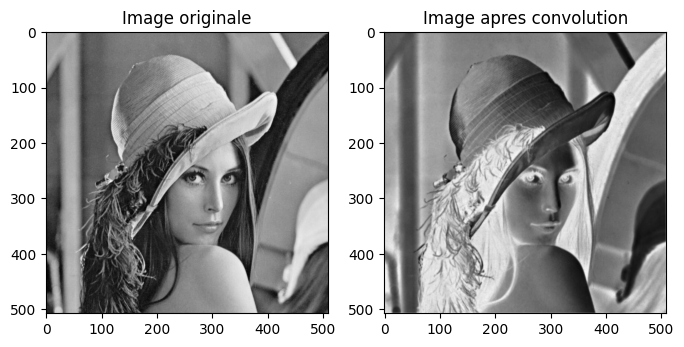

In [21]:
filtre_passe_haut_3x3 = np.array([[-1, -1, -1], [-1, -9, -1], [-1, -1, -1]],float)
res3 = convolution(img,filtre_passe_haut_3x3)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Image originale')
ax[1].imshow(res3, cmap='gray')
ax[1].set_title('Image apres convolution')
plt.show() 

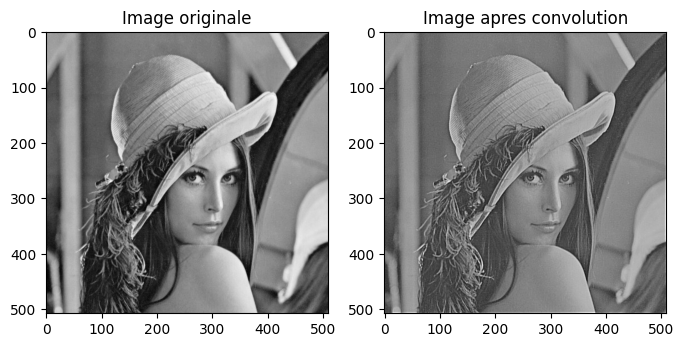

In [22]:
filtre_passe_haut_5x5 = np.array([[-1,-1,-1,-1,-1], [-1,0,0,0,-1], [-1,0,32,0,-1], [-1,0,0,0,-1],[-1,-1,-1,-1,-1]], float)/16
res4 = convolution(img,filtre_passe_haut_5x5)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Image originale')
ax[1].imshow(res4, cmap='gray')
ax[1].set_title('Image apres convolution')
plt.show() 

Le filtre passe bas a flouté l'imag et le filtre passe haut a accentuer les hautes fréquences.


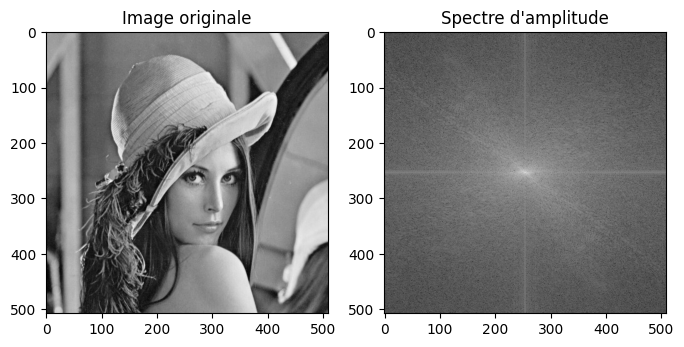

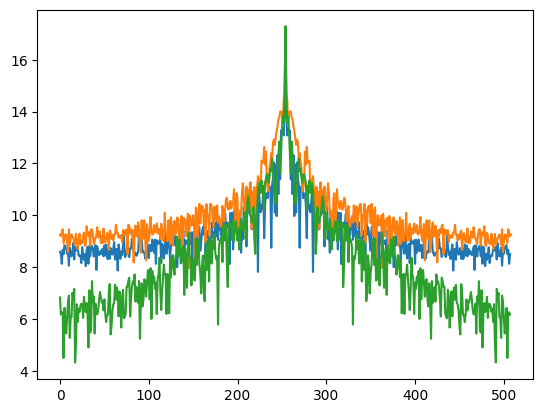

In [17]:
# representation frequentielle 
f = np.fft.fft2(img)
f_shift = np.fft.fftshift(f)
magnitude = np.log(np.abs(f_shift))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Image originale")
ax[1].imshow(magnitude, cmap='gray')
ax[1].set_title("Spectre d'amplitude")
plt.show()
plt.plot(magnitude[:, magnitude.shape[1]//2])
plt.plot(magnitude[magnitude.shape[0]//2, :])
plt.plot(np.diag(magnitude))

In [24]:
from sklearn.metrics import mean_squared_error
eqm1 = mean_squared_error(img, res1)
eqm2 = mean_squared_error(img, res2)
eqm3 = mean_squared_error(img, res3)
eqm4 = mean_squared_error(img, res4)
print(eqm1)
print(eqm2)
print(eqm3)
print(eqm4)

24.778490991508168
49.82396061488317
5701584.305992141
148.35654893148717
